In [50]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.reset_defaults
sns.set_style(style='darkgrid')
sns.set_context(context='notebook')
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.rcParams["patch.force_edgecolor"] = True
plt.rcParams["figure.figsize"] = (20.0, 10.0)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.max_rows', 2000)
font = {'size'   : 20}
plt.rc('font', **font)
plt.ion()
%matplotlib inline

In [2]:
cd ..

/Users/jeremymiller/GoogleDrive/Data_Science/Galvanize/dsi-capstone


In [3]:
import src.features.build_features as bf

In [4]:
cd notebooks/

/Users/jeremymiller/GoogleDrive/Data_Science/Galvanize/dsi-capstone/notebooks


In [5]:
import altair

In [5]:
    st_asmt_df = pd.read_csv('../data/raw/studentAssessment.csv')
    asmt_df = pd.read_csv('../data/raw/assessments.csv')

In [6]:
st_asmt_df[st_asmt_df['score'] == 0].count()
st_asmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
id_assessment     173912 non-null int64
id_student        173912 non-null int64
date_submitted    173912 non-null int64
is_banked         173912 non-null int64
score             173739 non-null float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


Observations: most students have average scores around 80, should look at number of assessments

get score on first assessment per st/mod/pre:

get max days_submitted early of first assessment, then merge and filter by?

In [8]:
ass_join = bf._join_asssessments(st_asmt_df, asmt_df)

In [9]:
ass_join.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_submitted_early
0,1752,11391,18.0,0.0,78.0,AAA,2013J,TMA,19.0,10.0,1.0
1,1752,28400,22.0,0.0,70.0,AAA,2013J,TMA,19.0,10.0,-3.0
2,1752,31604,17.0,0.0,72.0,AAA,2013J,TMA,19.0,10.0,2.0
3,1752,32885,26.0,0.0,69.0,AAA,2013J,TMA,19.0,10.0,-7.0
4,1752,38053,19.0,0.0,79.0,AAA,2013J,TMA,19.0,10.0,0.0


In [25]:
asmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
code_module          206 non-null object
code_presentation    206 non-null object
id_assessment        206 non-null int64
assessment_type      206 non-null object
date                 195 non-null float64
weight               206 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


In [37]:
asmt_df.groupby(by=['code_module', 'code_presentation']).count()[['id_assessment']]

id_assessment
code_module code_presentation               
AAA         2013J                          6
            2014J                          6
BBB         2013B                         12
            2013J                         12
            2014B                         12
            2014J                          6
CCC         2014B                         10
            2014J                         10
DDD         2013B                         14
            2013J                          7
            2014B                          7
            2014J                          7
EEE         2013J                          5
            2014B                          5
            2014J                          5
FFF         2013B                         13
            2013J                         13
            2014B                         13
            2014J                         13
GGG         2013J                         10
            2014B                         10
            2014J                         10

In [47]:
asmt_df.groupby(by=['code_module', 'code_presentation']).median()[['date']]

date
code_module code_presentation       
AAA         2013J              117.0
            2014J              117.0
BBB         2013B              124.0
            2013J              131.0
            2014B              117.0
            2014J              110.0
CCC         2014B              119.5
            2014J              126.5
DDD         2013B              115.0
            2013J              123.0
            2014B              116.0
            2014J               86.5
EEE         2013J              124.0
            2014B              117.0
            2014J              131.0
FFF         2013B              222.0
            2013J              236.0
            2014B              227.0
            2014J              241.0
GGG         2013J              229.0
            2014B              222.0
            2014J              229.0

In [51]:
asmt_df #[(asmt_df['code_module'] == 'FFF')]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
5,AAA,2013J,1757,Exam,NaN,100.0
6,AAA,2014J,1758,TMA,19.0,10.0
7,AAA,2014J,1759,TMA,54.0,20.0
8,AAA,2014J,1760,TMA,117.0,20.0
9,AAA,2014J,1761,TMA,166.0,20.0


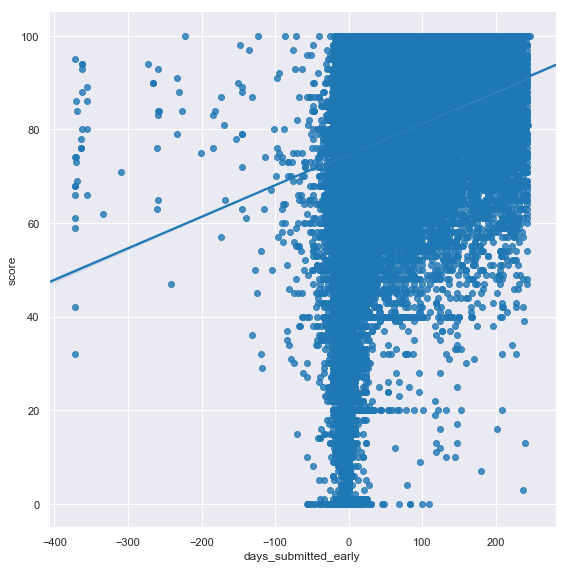

In [10]:
sns.lmplot(x='days_submitted_early', y='score', data=ass_join, height=8)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


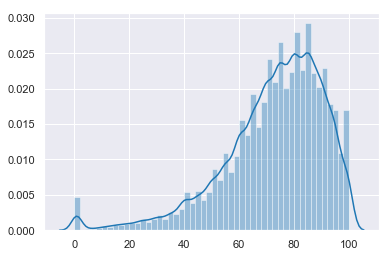

In [17]:
sns.distplot(ass_join[ass_join['assessment_type']=='TMA'][['score']])

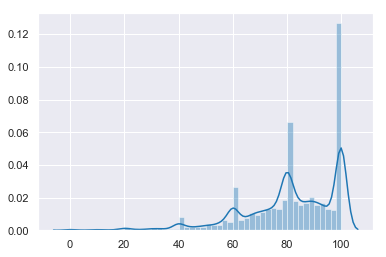

In [18]:
sns.distplot(ass_join[ass_join['assessment_type']=='CMA'][['score']])

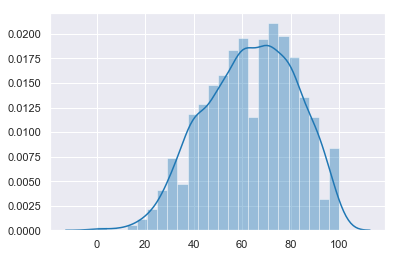

In [19]:
sns.distplot(ass_join[ass_join['assessment_type']=='Exam'][['score']])

In [7]:
ass_join.sample(10)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,days_submitted_early
53947,24291,501146,31.0,0.0,86.0,CCC,2014J,TMA,32.0,9.0,1.0
61122,24296,28787,69.0,0.0,60.0,CCC,2014J,CMA,67.0,7.0,-2.0
67322,25336,382497,77.0,0.0,78.0,DDD,2013B,TMA,81.0,12.5,4.0
41634,15021,696692,41.0,0.0,60.0,BBB,2014J,TMA,54.0,10.0,13.0
60413,24296,623221,69.0,0.0,83.0,CCC,2014J,CMA,67.0,7.0,-2.0
139463,34893,1578222,88.0,0.0,91.0,FFF,2014B,CMA,227.0,0.0,139.0
70147,25340,1044992,229.0,0.0,56.0,DDD,2013B,Exam,240.0,100.0,11.0
157640,34910,678452,237.0,0.0,72.0,FFF,2014J,CMA,241.0,0.0,4.0
111073,34866,521526,220.0,0.0,95.0,FFF,2013B,CMA,222.0,0.0,2.0
19391,14999,551205,130.0,0.0,54.0,BBB,2013J,TMA,131.0,18.0,1.0


In [ ]:
ass_join.unstack

In [66]:
early_max = ass_join.groupby(by=['code_module', 'code_presentation', 
                     'id_student']).max()[['days_submitted_early']]

In [71]:
# early_max.head(20)

In [72]:
merged = pd.merge(ass_join, early_max, how = 'outer', on = ['id_student', 'code_module', 'code_presentation'])

In [76]:
# merged.head(20)

In [94]:
with_first_assessment = merged[merged['days_submitted_early_x'] == merged['days_submitted_early_y']][['score']]

In [96]:
with_first_assessment.rename({'score': 'first_assessment_score'}, axis = 1, inplace = True)

In [97]:
with_first_assessment

,first_assessment_score
4,82.0
9,60.0
11,71.0
15,69.0
17,63.0
19,75.0
20,79.0
22,74.0
23,50.0
24,68.0


In [88]:
score_first_assessment = with_first_assessment[['days_submitted_early_y', 'score']]

In [91]:
score_first_assessment

,days_submitted_early_y,score
4,3.0,82.0
9,3.0,60.0
11,3.0,71.0
15,-7.0,69.0
17,-7.0,63.0
19,-7.0,75.0
20,0.0,79.0
22,0.0,74.0
23,0.0,50.0
24,0.0,68.0


right above this is the process for getting the score of the first assessment for each student in each module / presentation; take care to rename 'days sub early'  as max...

In [33]:
ass_per_st.head(50)

id_assessment  date_submitted  \
code_module code_presentation id_student                                  
AAA         2013J             11391                1752            18.0   
                              28400                1752            22.0   
                              31604                1752            17.0   
                              32885                1752            26.0   
                              38053                1752            19.0   
                              45462                1752            20.0   
                              45642                1752            18.0   
                              52130                1752            19.0   
                              53025                1752             9.0   
                              57506                1752            18.0   
                              58873                1752            19.0   
                              59185                1752            18.0   
                              62155                1752            17.0   
                              63400                1752            19.0   
                              65002                1752            17.0   
                              70464                1752            19.0   
                              71361                1752            19.0   
                              74372                1752            22.0   
                              75091                1752            18.0   
                              77367                1752            18.0   
                              91265                1752            21.0   
                              94961                1752            17.0   
                              98094                1752            18.0   
                              100893               1752            17.0   
                              101781               1752            16.0   
                              102806               1752            19.0   
                              102952               1752            19.0   
                              104476               1752            30.0   
                              106247               1752            32.0   
                              106577               1752            18.0   
                              110175               1752            18.0   
                              111717               1752            10.0   
                              113295               1752            19.0   
                              114017               1752            18.0   
                              114999               1752            18.0   
                              116541               1752            19.0   
                              116692               1752            16.0   
                              118983               1752            19.0   
                              123044               1752            25.0   
                              127582               1752            26.0   
                              129955               1752            18.0   
                              132976               1752            18.0   
                              134143               1752            18.0   
                              135400               1752            19.0   
                              137873               1752            15.0   
                              141355               1752            19.0   
                              141377               1752            54.0   
                              142326               1752            17.0   
                              144801               1752            19.0   
                              145130               1752            19.0   

                                          is_banked  score assessment_type  \
code_module code_presentation id_student                       

In [18]:
ass_join = bf._join_asssessments(st_asmt_df, asmt_df)

How many assessment are there for each student in each module / presentation?
It varies, but each student has at least one assessment

In [25]:
ass_per_st = ass_join.groupby(by=['code_module', 'code_presentation', 
                     'id_student']).count()

In [26]:
ass_per_st[ass_per_st['id_assessment'] == 0]

,,,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,days_submitted_early
code_module,code_presentation,id_student,,,,,,,,


In [8]:
st_assess['is_banked'].sum()

1909

In [9]:
by_student = st_assess.groupby(by='id_student').mean().drop('id_assessment', axis=1)

In [10]:
by_student.sort_values(by=['score'], axis=0, ascending=False, inplace=True)

/Users/jeremymiller/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


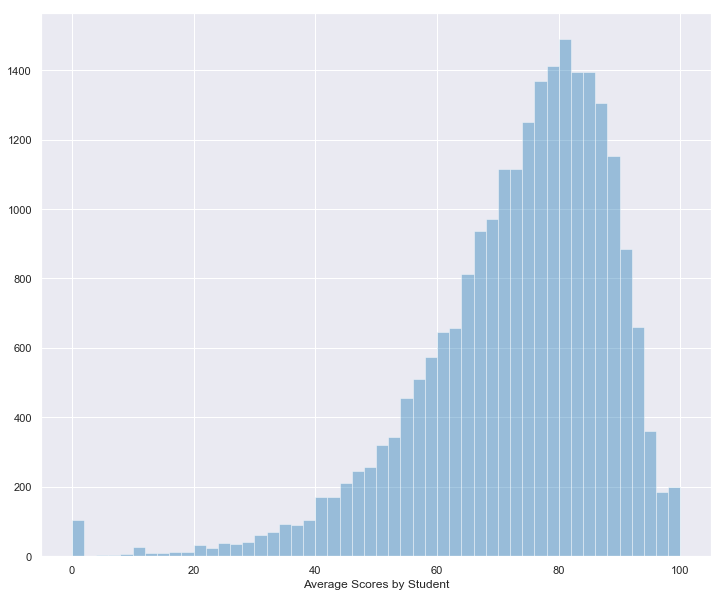

In [11]:
fig, ax = plt.subplots(figsize=(12,10))
sns.distplot(by_student.dropna()['score'], kde=False, axlabel='Global Average Scores by Student' )